# LM Plot
It stands for Linear Model Plot. It just like regplot but in the addition it has access to the FacetGrid which useful in plotting small multiples.

In [1]:
#Importing Library
import seaborn as sns

#Setting Style
sns.set_style('darkgrid')

#loading the data
df=sns.load_dataset('penguins').dropna()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


### Creating an LMPlot

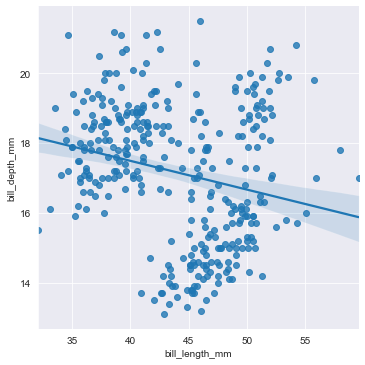

In [2]:
sns.lmplot(data=df, x='bill_length_mm', y='bill_depth_mm');
#this plot looks identical to the regplot

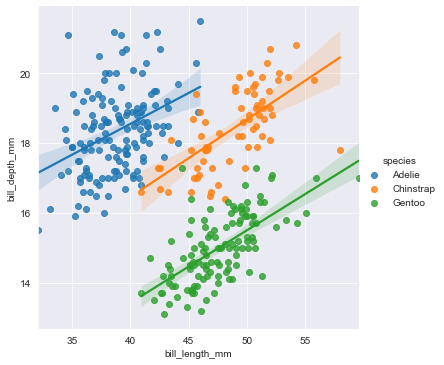

In [3]:
#Hue for category
#here we can set hue and obtain different plots for differnt penguins
sns.lmplot(data=df, x='bill_length_mm', y='bill_depth_mm',hue='species');
#previous plot was showing negative correlation
#this shows positive correlation

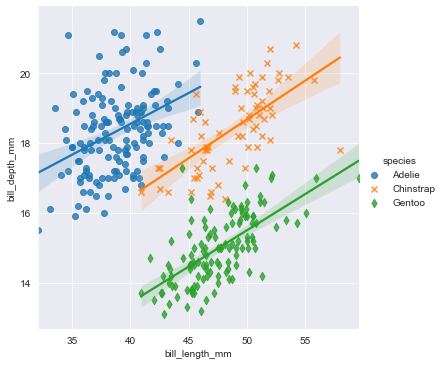

In [4]:
#Markers
sns.lmplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species', markers=['o', 'x', 'd']);

### Facet Grid
Dealing with too many categories at the same time with facetgrid.

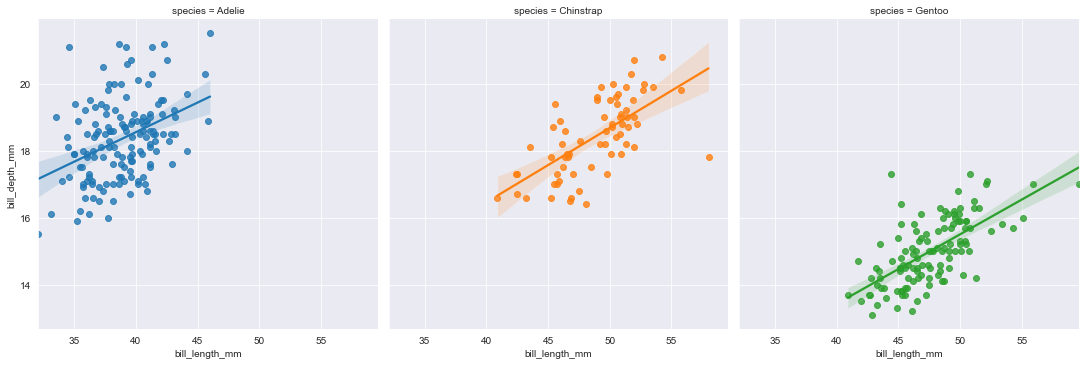

In [5]:
#using cols for seperating species
sns.lmplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species', col='species');

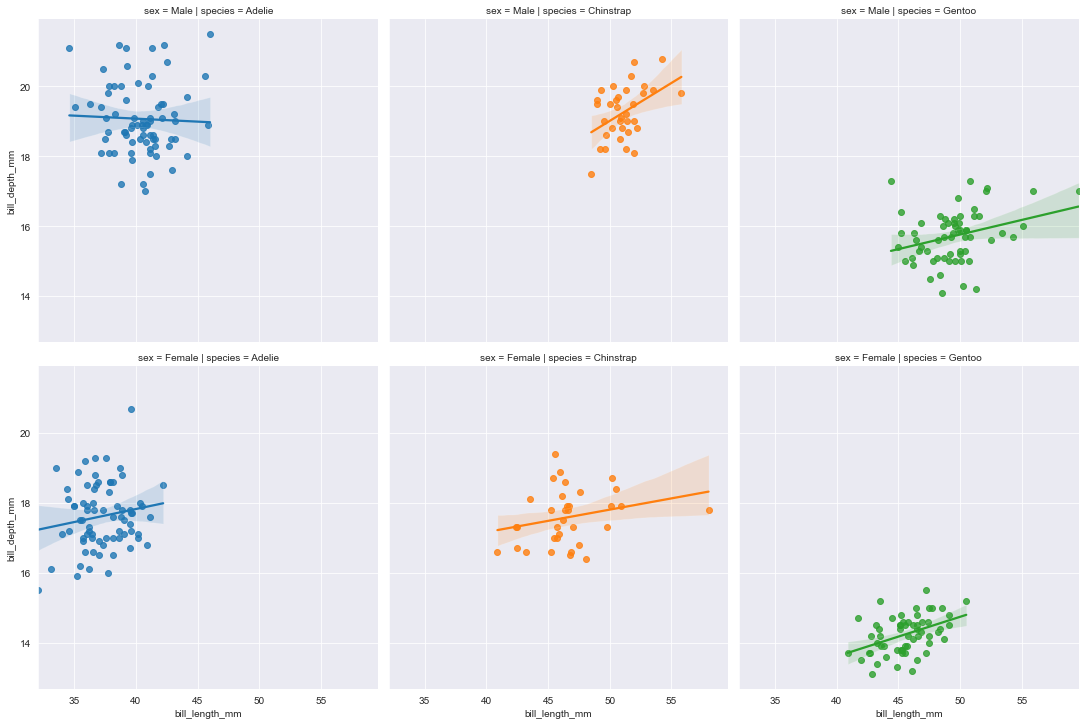

In [6]:
#using rows for seperating sex
sns.lmplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species', col='species', row='sex');

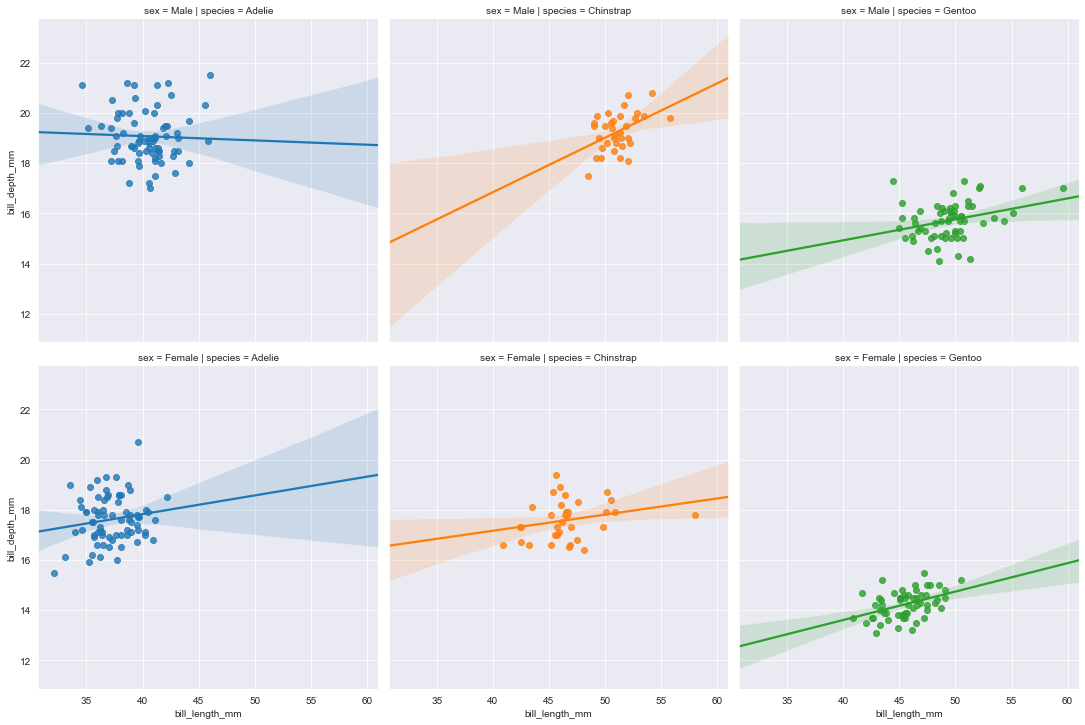

In [7]:
#truncate for removing the space we get after splitting into rows and columns
sns.lmplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species', col='species', row='sex', truncate=False);

### Additional Functions

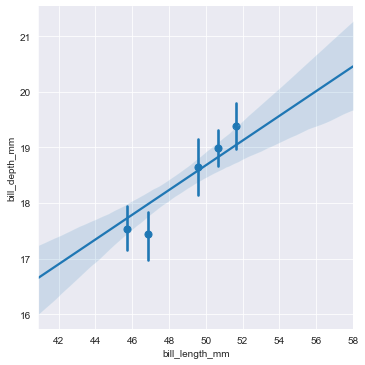

In [8]:
#x_bins for binning the data
#taking data only for the chinstraps
sns.lmplot(data=df[df.species=='Chinstrap'], x='bill_length_mm', y='bill_depth_mm', x_bins=5);

### Building Logistic Regression Model

In [9]:
#Making an additional column for our own use
df['sex_binary']=[(x=='Male') for x in df.sex]
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,sex_binary
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,True
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,False
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,False
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,False
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,True


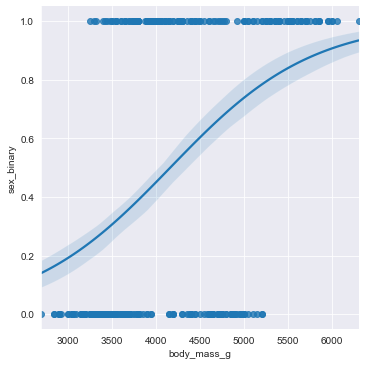

In [10]:
#plotting with lmplot
sns.lmplot(data=df, x='body_mass_g', y='sex_binary', logistic=True, n_boot=100);

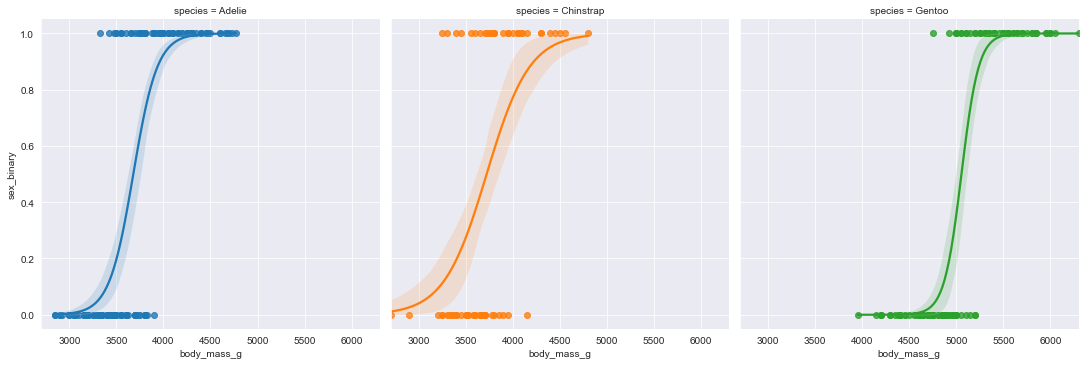

In [11]:
#using facet grid for plotting the above plot for each category differently
sns.lmplot(data=df, x='body_mass_g', y='sex_binary', logistic=True, n_boot=100, hue='species', col='species');

### Styling

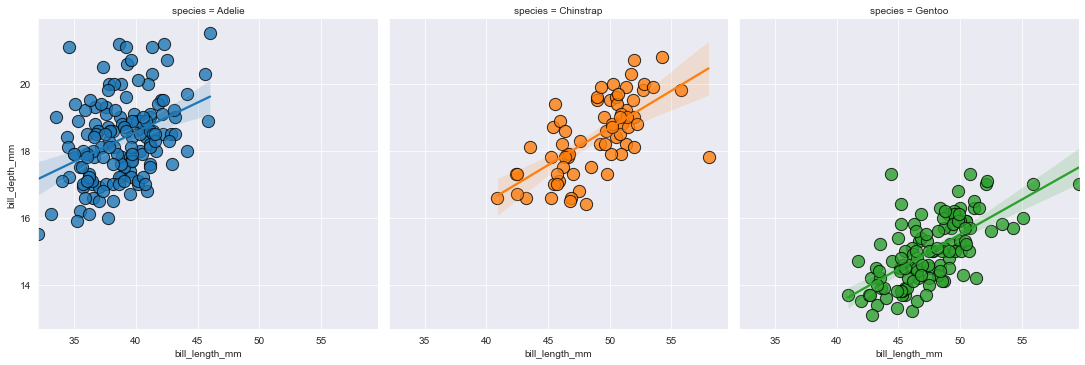

In [12]:
#scatter_kws for making changes in scatterplot
sns.lmplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species', col='species', scatter_kws={'s':150, 'edgecolor':'black'});

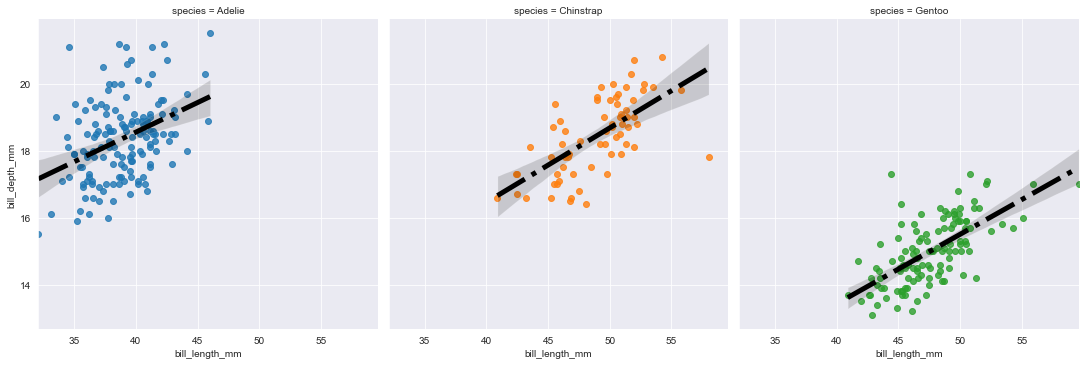

In [13]:
#line_kws for making changes in the regression line
sns.lmplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species', col='species', line_kws={'lw':5, 'ls':'-.','color':'black'});

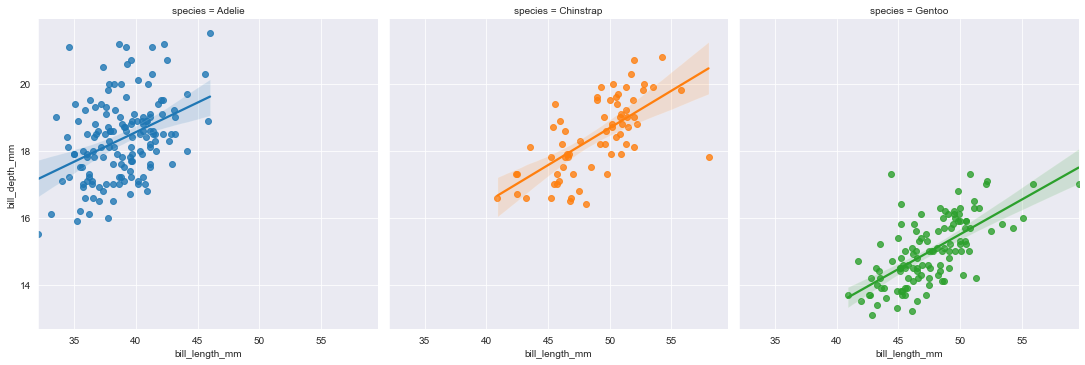

In [14]:
#FacetGrid
#the lmplot returns the facetgrid objects
#therefore we can facetfrid methods on it
g=sns.lmplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species', col='species');

In [15]:
type(g)

seaborn.axisgrid.FacetGrid

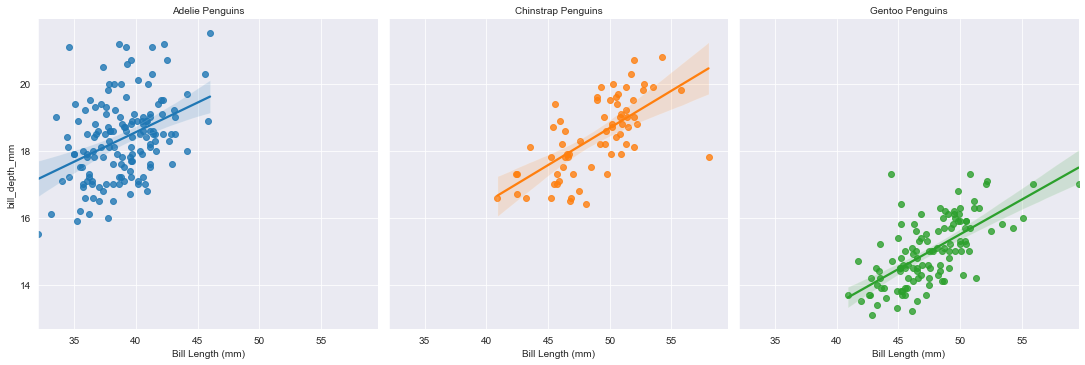

In [16]:
g=sns.lmplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species', col='species');
g.set_titles(col_template='{col_name} Penguins')
g.set_xlabels('Bill Length (mm)');

The End